A quick project demonstrating how various strategies for applying antibiotics might lead to antibacterial resistance. Each bacterium has genes G = [G1, G2, G3, ... , GN] and the n-th gene represents the amount of immunity to the n-th kind of antibiotic. Each antibiotic strategy S = [S1, S2, S3, ... , SN] represents a concentration of that antibiotic. If a bacterium has genes G and is hit by strategy S then the probability that each antibiotic kills it increases with Si and decreases with Gi.

The environment can provide for at most B bacteria, and if there are b < B bacteria then we pick bacteria at random and try to repoduce, based on their energy. Each bacterium rolls r.unfirom(0, 1) of energy and if their energy exceeds their minimum reproduction energy, they reproduce, which leads to a copy of the gene which may have a small mutation. The more antibiotic resistance a bacterium has, the more energy it takes to reproduce. It is hypothesised that on the whole, bacteria will evolve the least antibiotic resistance required to survive the S we hit them with. 

The main control variables worth playing around with are:-
- the number of antibiotics (N)
- the maximum bumber of bacteria (B)
- the cost to reproduction chances of high antibiotic resistance (getReproductionProbability)
- how survival probabilities change with strategy S and genome G (checkSurvival)
- background death rate (backgroundDeathChance)
- how the replacement bacteria work if the population extincts (numBacteria in repopulate)
- the initial population of bacteria (generateRandomGenome)
- how mutations work (mutateGenome)

Imports

In [1]:
import random as r
import matplotlib.pyplot as plt

In [ ]:
N = 10 #number of antibiotics
B = 1000 #maximum number of bacteria
simulationLength = 1000 #Number of timesteps to simulate
backgroundDeathChance = 0.1 #Probability each bacterium randomly dies each timestep

## Simulation Logic

In [2]:
def generateRandomGenome():
    return([r.uniform(0, 1) for c in range(N)])

def getReproductionProbability(genome):
    return(sum(g for g in genome) / N)

def mutateGenome(genome, mutationProb = 1/N):
    output = [g for g in genome]
    for i in range(N):
        if r.uniform(0, 1) < mutationProb:
            output[i] = r.uniform(0, 1)
    return(output)

def attemptReproduction(genome):
    prob = r.uniform(0, 1)
    if prob < getReproductionProbability(genome):
        return(mutateGenome(genome))
    else:
        return(None)
        
def checkSurvival(gene, strategy, backgroundDeathChance):
    survive = False if r.uniform(0, 1) < backgroundDeathChance else True
    i = 0
    while i < N and survive:
        prob = r.uniform(strategy[i] / 2, strategy[i])
        if prob > gene[i]:
            survive = False
        i += 1
    return(survive)

def generateInitialPopulation():
    return([generateRandomGenome() for c in range(B)])

def applyStrategy(population, strategy):
    output = []
    for gene in population:
        if checkSurvival(gene, strategy):
            output.append(gene)
    return(output)

#If all bacteria are dead, generate a small number of new bacteria. Otherwise, mutate existing bacteria
def repopulate(population):
    output = [g for g in population]
    if len(population) == 0:
        numBacteria = r.randint(1, 5) #At least 1 and at most 5 new bacteria
        return([generateRandomGenome() for c in range(numBacteria)])
    else:
        while len(output) < B:
            reproducingIndividual = r.choice(population)
            outcome = attemptReproduction(reproducingIndividual)
            if outcome is not None:
                output.append(outcome)
        return(output)

def getAverageImmunities(population):
    output = [0 for c in range(N)]
    for individual in population:
        for i in range(N):
            output[i] += individual[i] / B
    return(output)

## Strategies

In [3]:
def noAntibiotics(i):
    return([0 for n in range(N)])

def strongBroadSpectrum(i):
    return([1 for n in range(N)])

def weakBroadSpectrum(i):
    return([0.75 for n in range(N)])

#This is what you would do if actively trying to cause resistance
def increasingBroadSpectrum(i):
    return([i / simulationLength for n in range(N)])

def constantNarrow(i):
    output = noAntibiotics(i)
    output[0] = 1
    return(output)

def changingNarrow(i):
    output = noAntibiotics(i)
    output[i % N] = 1
    return(output)

def changingDoubleNarrow(i):
    output = noAntibiotics(i)
    output[i % N] = 1
    output[(i + int(N/2)) % N] = 1
    return(output)

def periodicStrike(i):
    return(noAntibiotics(i) if r.uniform(0, 1) < 0.9 else strongBroadSpectrum(i))
    
def randomStrategy(i):
    return([r.uniform(0, 1) for n in range(N)])


strategies = [
    noAntibiotics,
    strongBroadSpectrum,
    weakBroadSpectrum,
    increasingBroadSpectrum,
    constantNarrow,
    changingNarrow,
    changingDoubleNarrow,
    periodicStrike,
    randomStrategy
]

## Testing

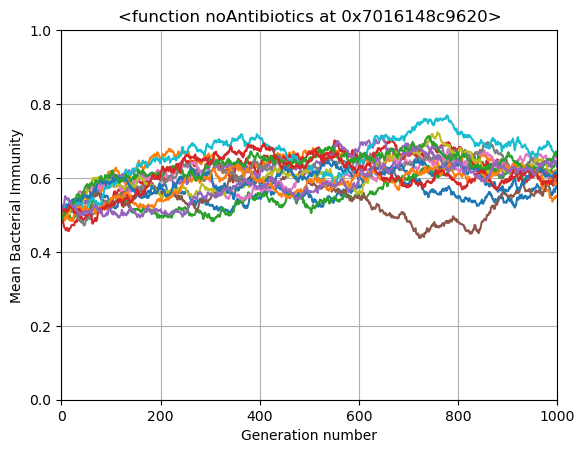

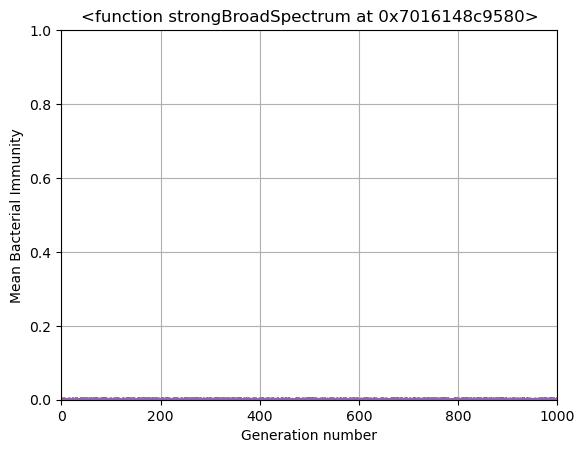

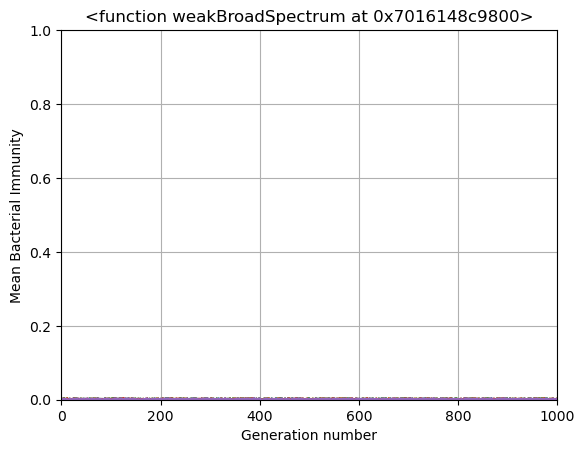

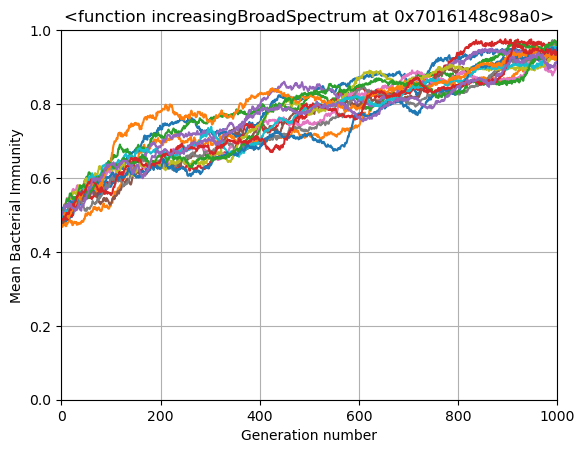

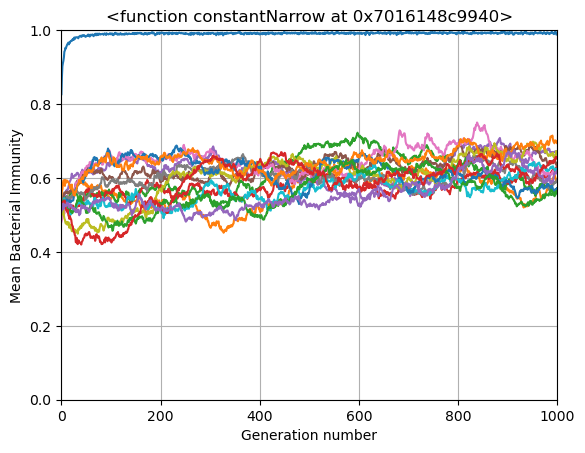

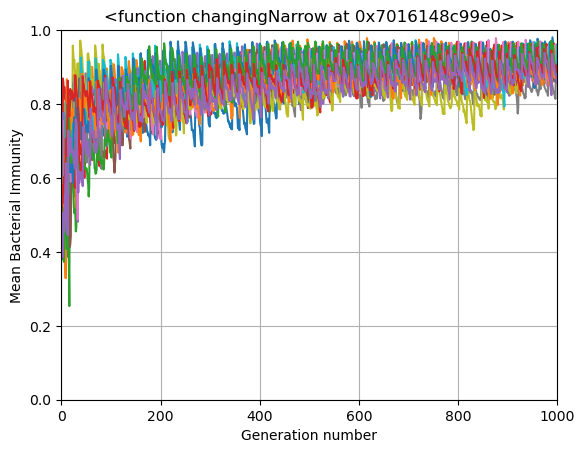

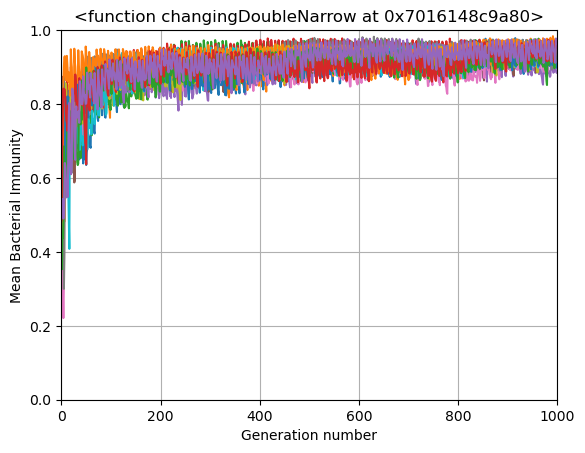

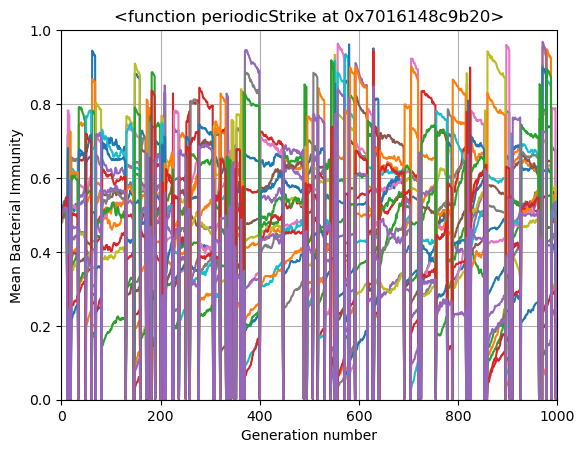

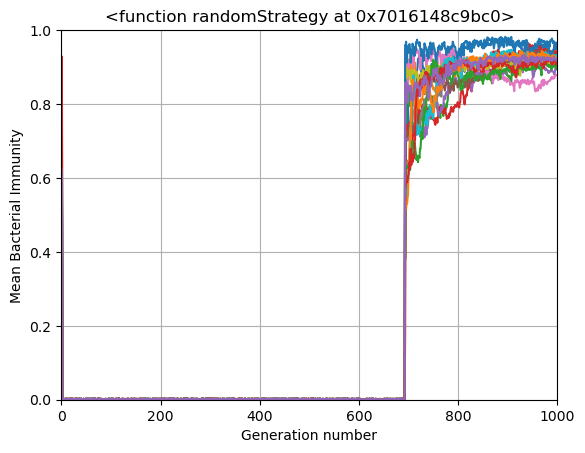

In [4]:
for strategyFunction in strategies:
    population = generateInitialPopulation()
    yData = []
    for i in range(simulationLength):
        strategy = strategyFunction(i)
        population = applyStrategy(population, strategy)
        population = repopulate(population)
        yData.append(getAverageImmunities(population))
    plt.plot(yData)
    plt.xlabel("Generation number")
    plt.ylabel("Mean Bacterial Immunity")
    plt.title(str(strategyFunction))
    plt.xlim(0, simulationLength)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()